In [1]:
#importing required libraries
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#reading data
yulu_data = pd.read_csv('bike_sharing.csv')

In [3]:
yulu_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### Exploratory Data Analysis [EDA]

In [4]:
yulu_data.shape

(10886, 12)

In [5]:
yulu_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
yulu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Observation**
- No null values in the data and there are no outliers as the max and min values are in the range.

**Changing dtype of datetime column**

In [7]:
yulu_data['datetime'] = pd.to_datetime(yulu_data['datetime'])

In [8]:
# adding columns with month, weekday, hour and date
yulu_data['month']=yulu_data['datetime'].dt.month
yulu_data['week_day']=yulu_data['datetime'].dt.day_name()
yulu_data['hour']=yulu_data['datetime'].dt.hour
yulu_data['date']= yulu_data['datetime'].dt.date

In [9]:
yulu_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,week_day,hour,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,Saturday,0,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,Saturday,1,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,Saturday,2,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,Saturday,3,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,Saturday,4,2011-01-01


In [10]:
# creating each day wise data without including weather condition in that particular day
day_data= yulu_data.groupby(['date','month','week_day','workingday','holiday','season'])[['count','casual','registered']].sum().reset_index()

In [11]:
day_data.head()

,date,month,week_day,workingday,holiday,season,count,casual,registered
0,2011-01-01,1,Saturday,0,0,1,985,331,654
1,2011-01-02,1,Sunday,0,0,1,801,131,670
2,2011-01-03,1,Monday,1,0,1,1349,120,1229
3,2011-01-04,1,Tuesday,1,0,1,1562,108,1454
4,2011-01-05,1,Wednesday,1,0,1,1600,82,1518


### variables describe the electric cycle demands

**1.Season:**

<AxesSubplot:xlabel='week_day', ylabel='count'>

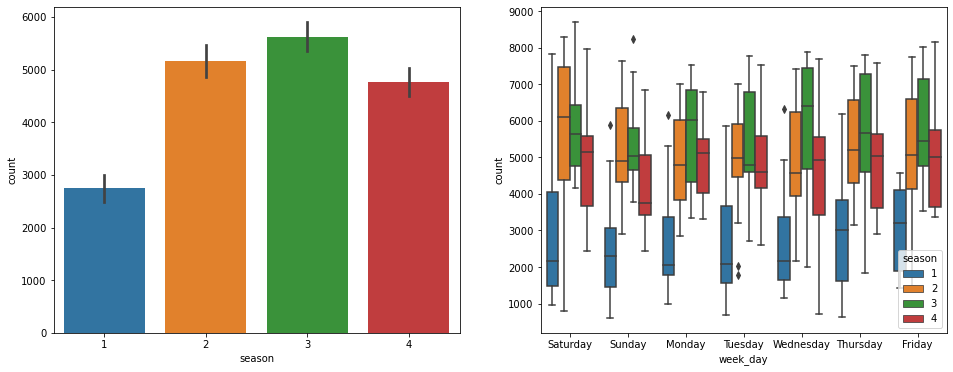

In [12]:
plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(data=yulu_data.groupby(['date','month','week_day','workingday','holiday','season'])['count'].sum().reset_index(),x='season',y='count')
plt.subplot(1,2,2)
sns.boxplot(data=yulu_data.groupby(['date','month','week_day','workingday','holiday','season'])['count'].sum().reset_index(),x='week_day',y='count',hue='season')

<AxesSubplot:xlabel='hour', ylabel='count'>

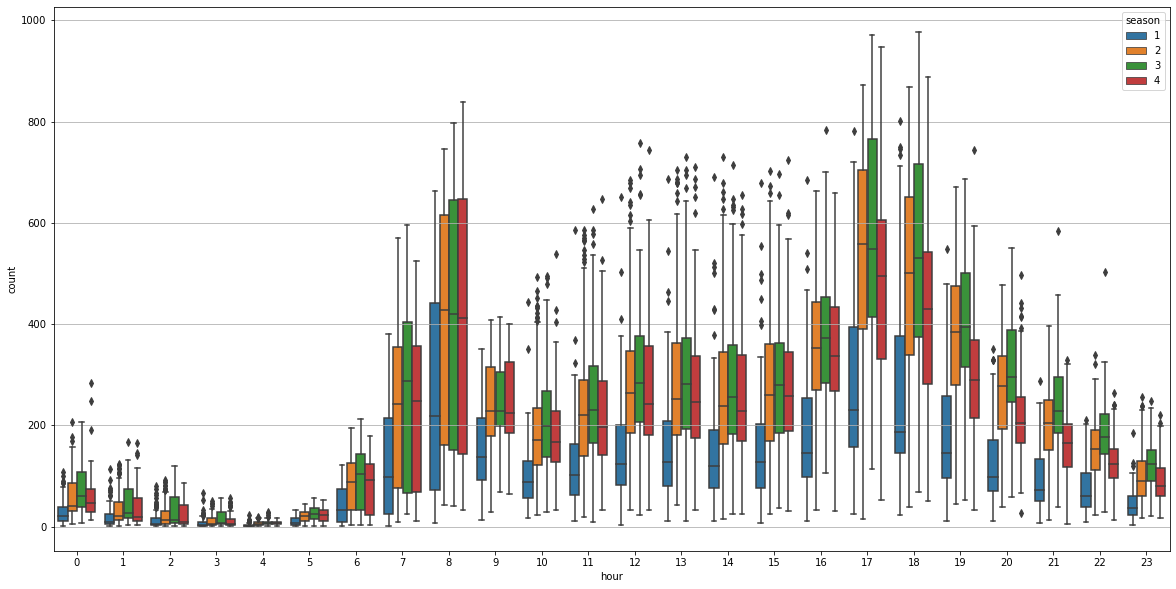

In [13]:
plt.figure(figsize=(20,10))
plt.grid()
sns.boxplot(data=yulu_data,x='hour',y='count',hue='season')

**Significance of season on demand**
- Comparing with all seasons in Season 1 deamand is low and in season 3 demand is high.
- From 6 to 16 hours the demand in season 2,3,4 are same.

**2.Holiday and workingday:**

<AxesSubplot:xlabel='workingday', ylabel='count'>

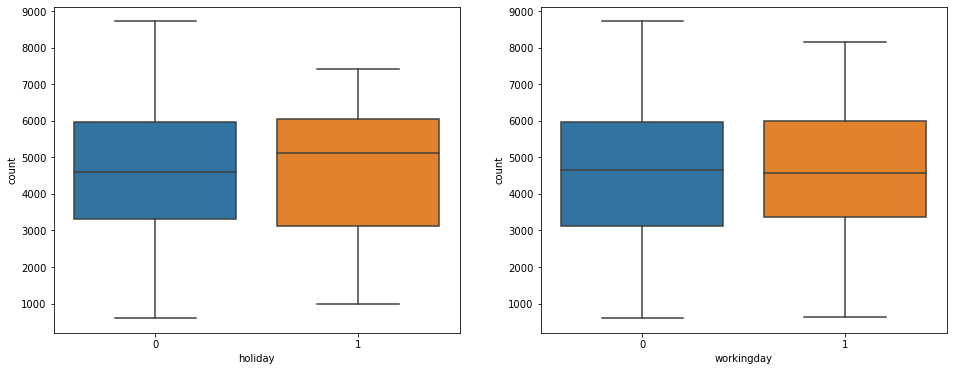

In [14]:
plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(data=day_data,x='holiday',y='count')
plt.subplot(1,2,2)
sns.boxplot(data=day_data,x='workingday',y='count')

<AxesSubplot:title={'center':'holiday=1'}, xlabel='hour', ylabel='count'>

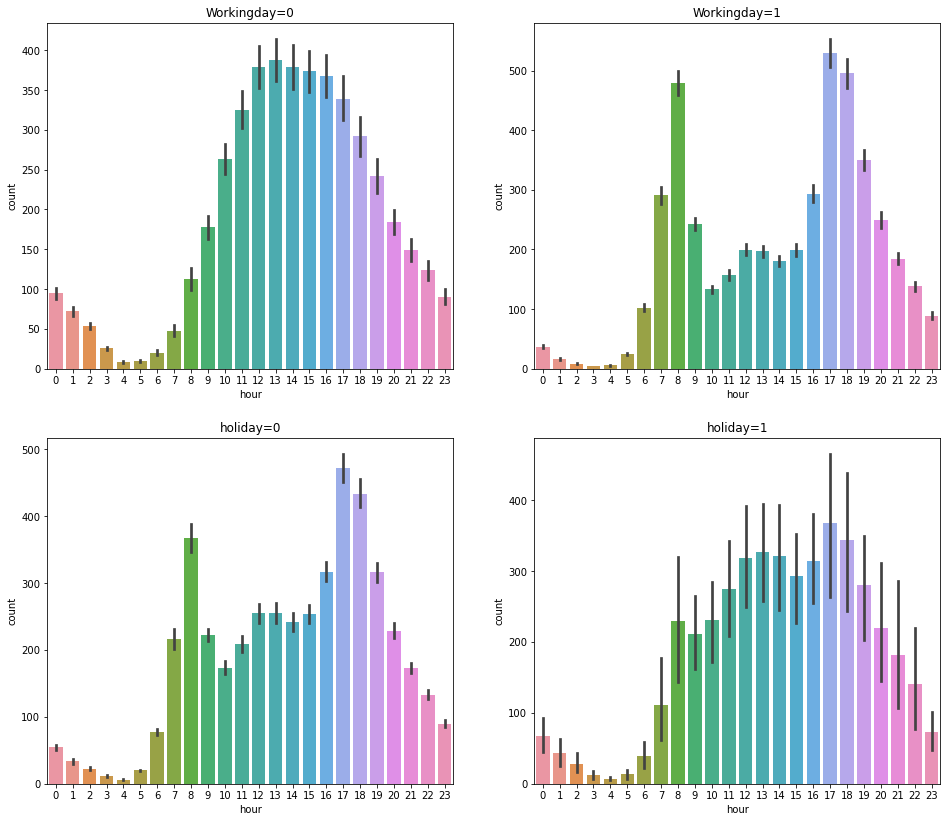

In [15]:
plt.subplots(2,2,figsize=(16,14))
plt.subplot(2,2,1)
plt.title('Workingday=0')
sns.barplot(data=yulu_data[yulu_data['workingday']==0],x='hour',y='count')
plt.subplot(2,2,2)
plt.title('Workingday=1')
sns.barplot(data=yulu_data[yulu_data['workingday']==1],x='hour',y='count')
plt.subplot(2,2,3)
plt.title('holiday=0')
sns.barplot(data=yulu_data[yulu_data['holiday']==0],x='hour',y='count')
plt.subplot(2,2,4)
plt.title('holiday=1')
sns.barplot(data=yulu_data[yulu_data['holiday']==1],x='hour',y='count')

<AxesSubplot:title={'center':'boxplot workingday and holiday'}, xlabel='workingday', ylabel='count'>

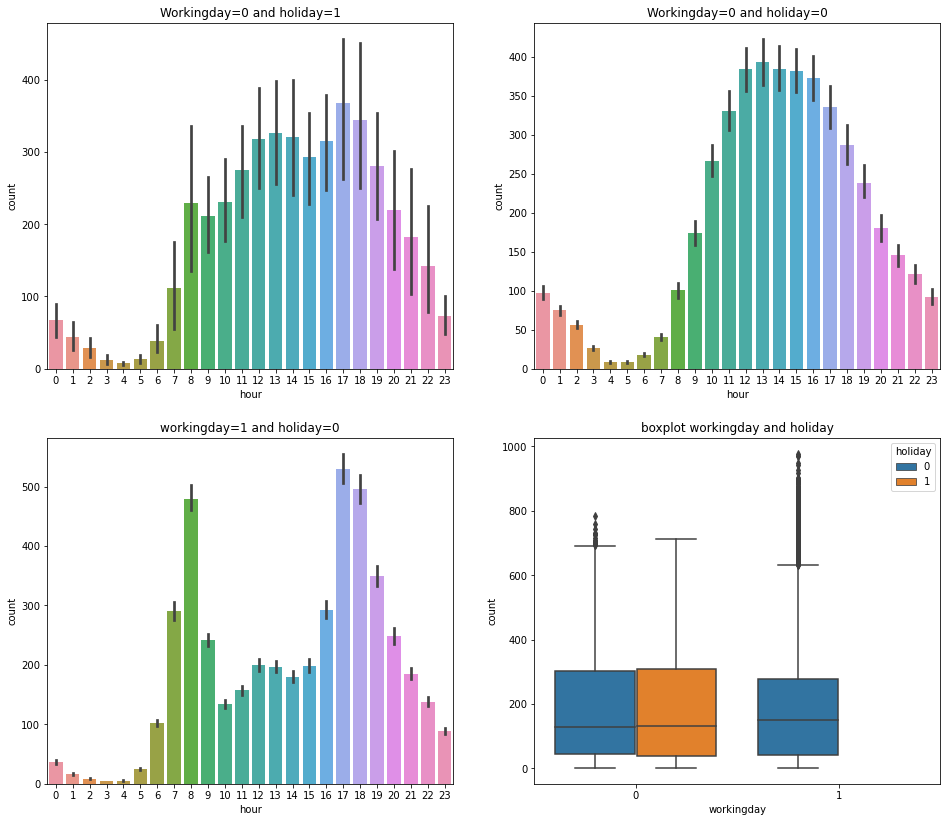

In [16]:
plt.subplots(2,2,figsize=(16,14))
plt.subplot(2,2,1)
plt.title('Workingday=0 and holiday=1')
sns.barplot(data=yulu_data[(yulu_data['workingday']==0) & (yulu_data['holiday']==1)],x='hour',y='count')
plt.subplot(2,2,2)
plt.title('Workingday=0 and holiday=0')
sns.barplot(data=yulu_data[(yulu_data['workingday']==0) & (yulu_data['holiday']==0)],x='hour',y='count')
plt.subplot(2,2,3)
plt.title('workingday=1 and holiday=0')
sns.barplot(data=yulu_data[(yulu_data['workingday']==1) & (yulu_data['holiday']==0)],x='hour',y='count')
plt.subplot(2,2,4)
plt.title('boxplot workingday and holiday')
sns.boxplot(data=yulu_data, x='workingday', y='count', hue='holiday')

**Significance of Workingday or Holiday on demand:**
- On Non-Working day the demand is constant from 11 to 16 hours
- On Working day the demand is high in 7-9 and 17-19 hours 
- On Holiday the demand is constant as on Non-Working day

**3.Weather:**

<AxesSubplot:xlabel='week_day', ylabel='count'>

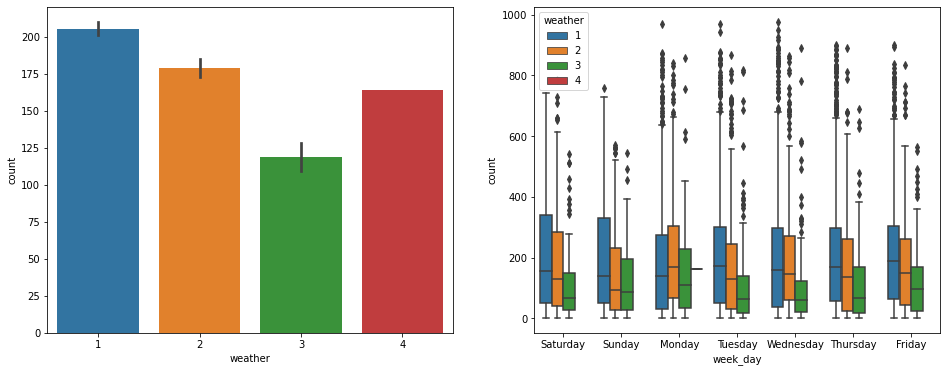

In [17]:
plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(data=yulu_data,x='weather',y='count')
plt.subplot(1,2,2)
sns.boxplot(data=yulu_data,x='week_day',y='count',hue='weather')

<AxesSubplot:xlabel='hour', ylabel='count'>

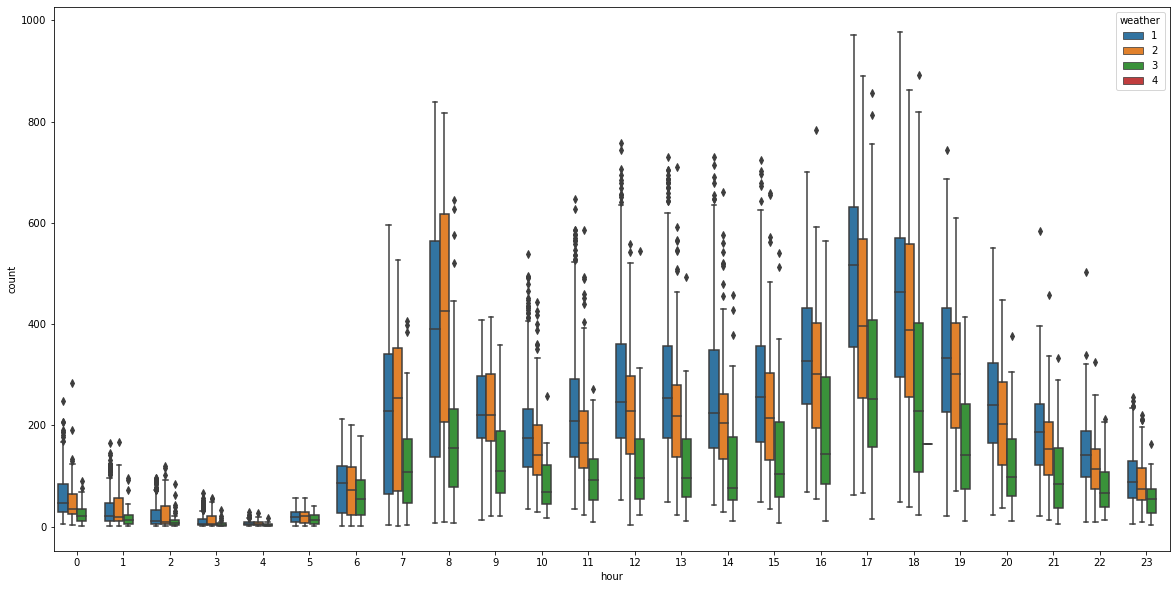

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(data=yulu_data,x='hour',y='count',hue='weather')

**Significance of weather on demand:**
- Comparing with all weathers, in weather 1 the demand is high and in weather 3 the demand is low.
- In between 6-9 hours the demand in weather 1 and 2 is same.
- As weather 4 data is only in one record we cannot give any conclusion on that.

**4.Temperature:**

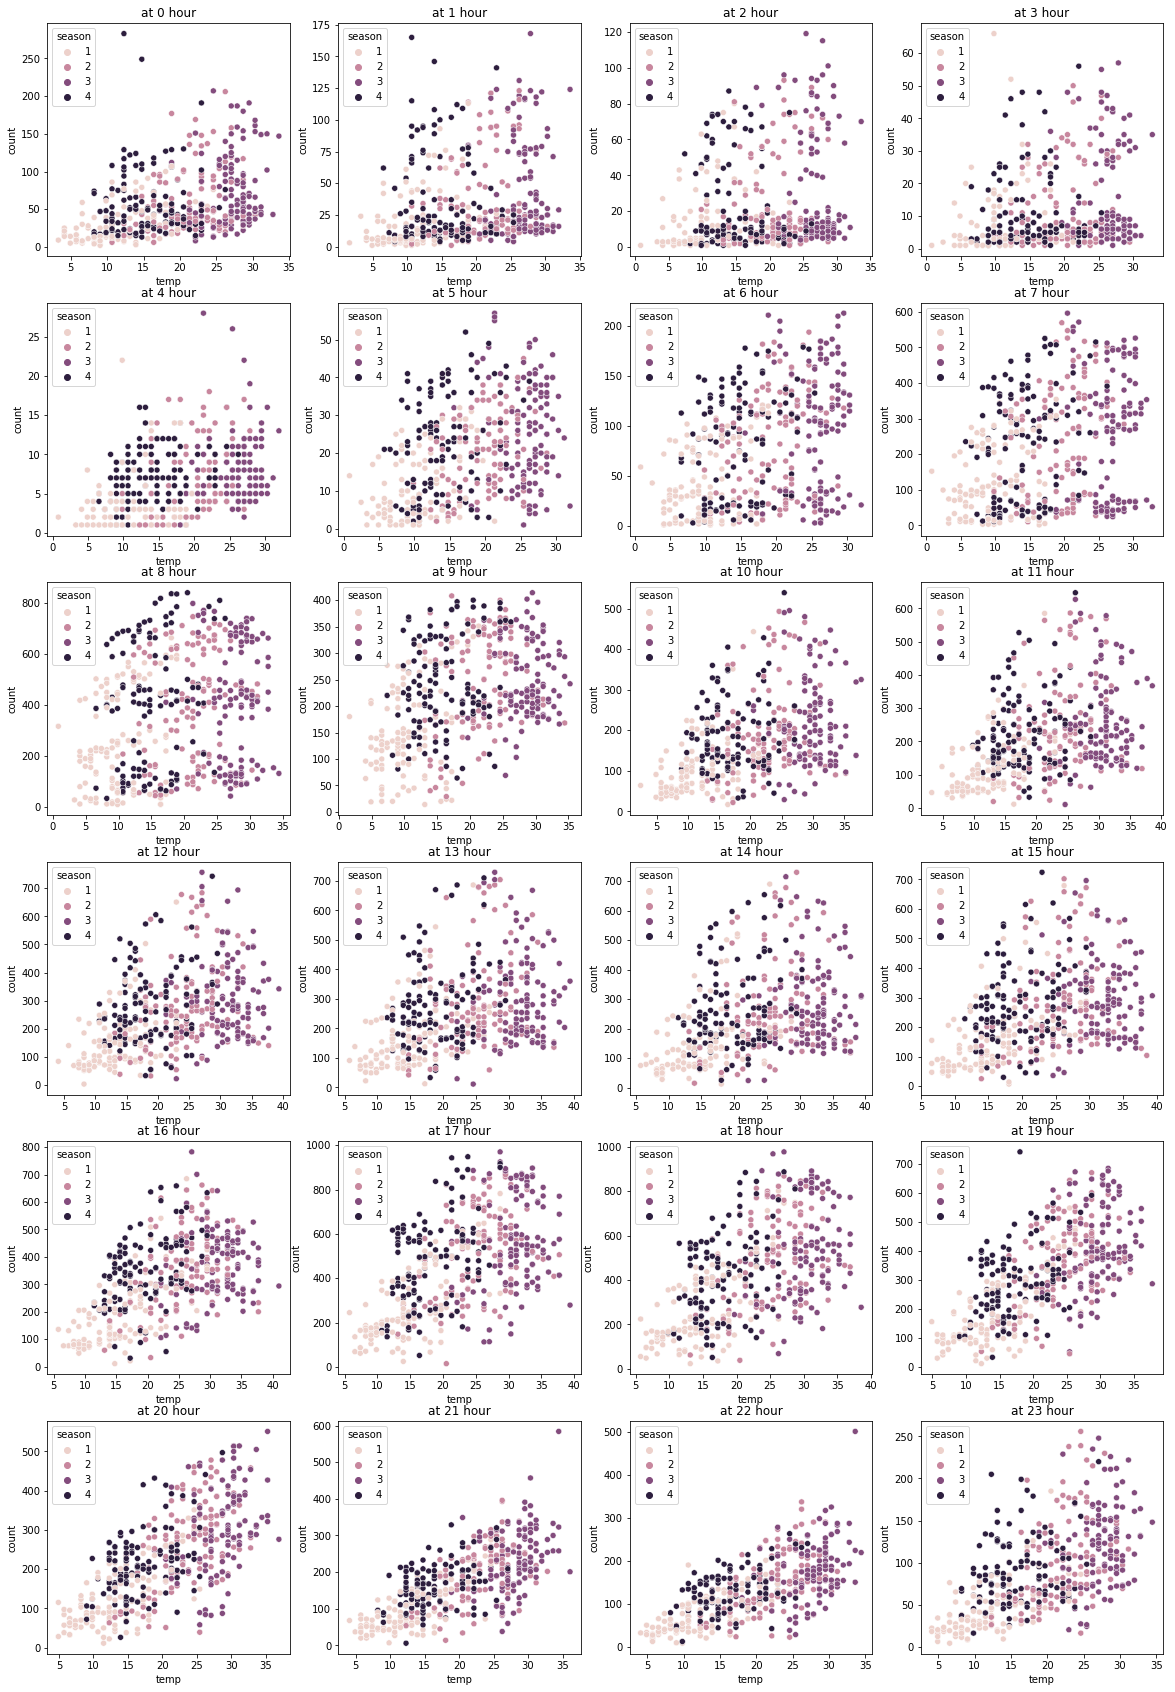

In [19]:
plt.subplots(6,4,figsize=(20,30))

for i in range(1,25): 
    plt.subplot(6,4,i)
    plt.title('at '+str(i-1)+' hour')
    sns.scatterplot(data=yulu_data[yulu_data['hour']==i-1],x='temp',y='count',hue='season')
plt.show()

**Significance of Temperature on demand**
- As the temperature is high there is more demand 
- On Working day from 7-9 hours the demand is almost same at any temperature greater than 10

**5.Humidity and windspeed:**

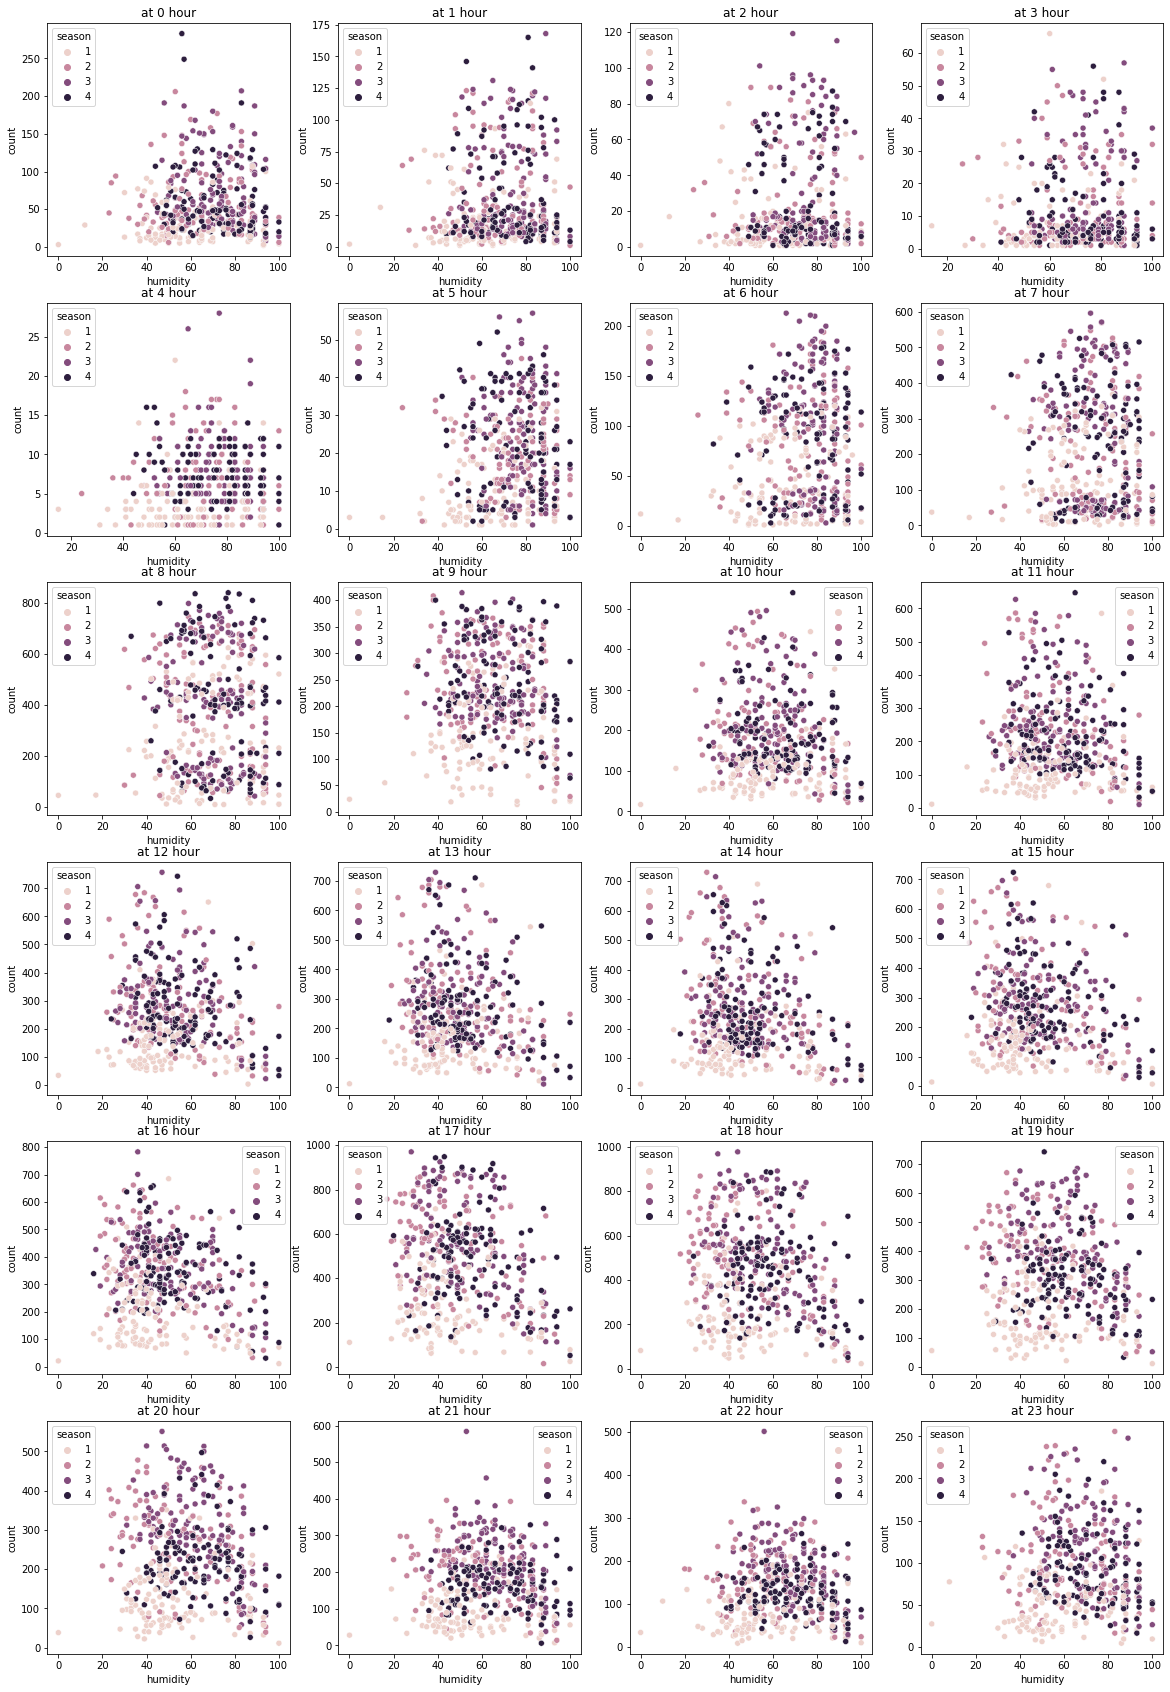

In [20]:
plt.subplots(6,4,figsize=(20,30))

for i in range(1,25): 
    plt.subplot(6,4,i)
    plt.title('at '+str(i-1)+' hour')
    sns.scatterplot(data=yulu_data[yulu_data['hour']==i-1],x='humidity',y='count',hue='season')
plt.show()

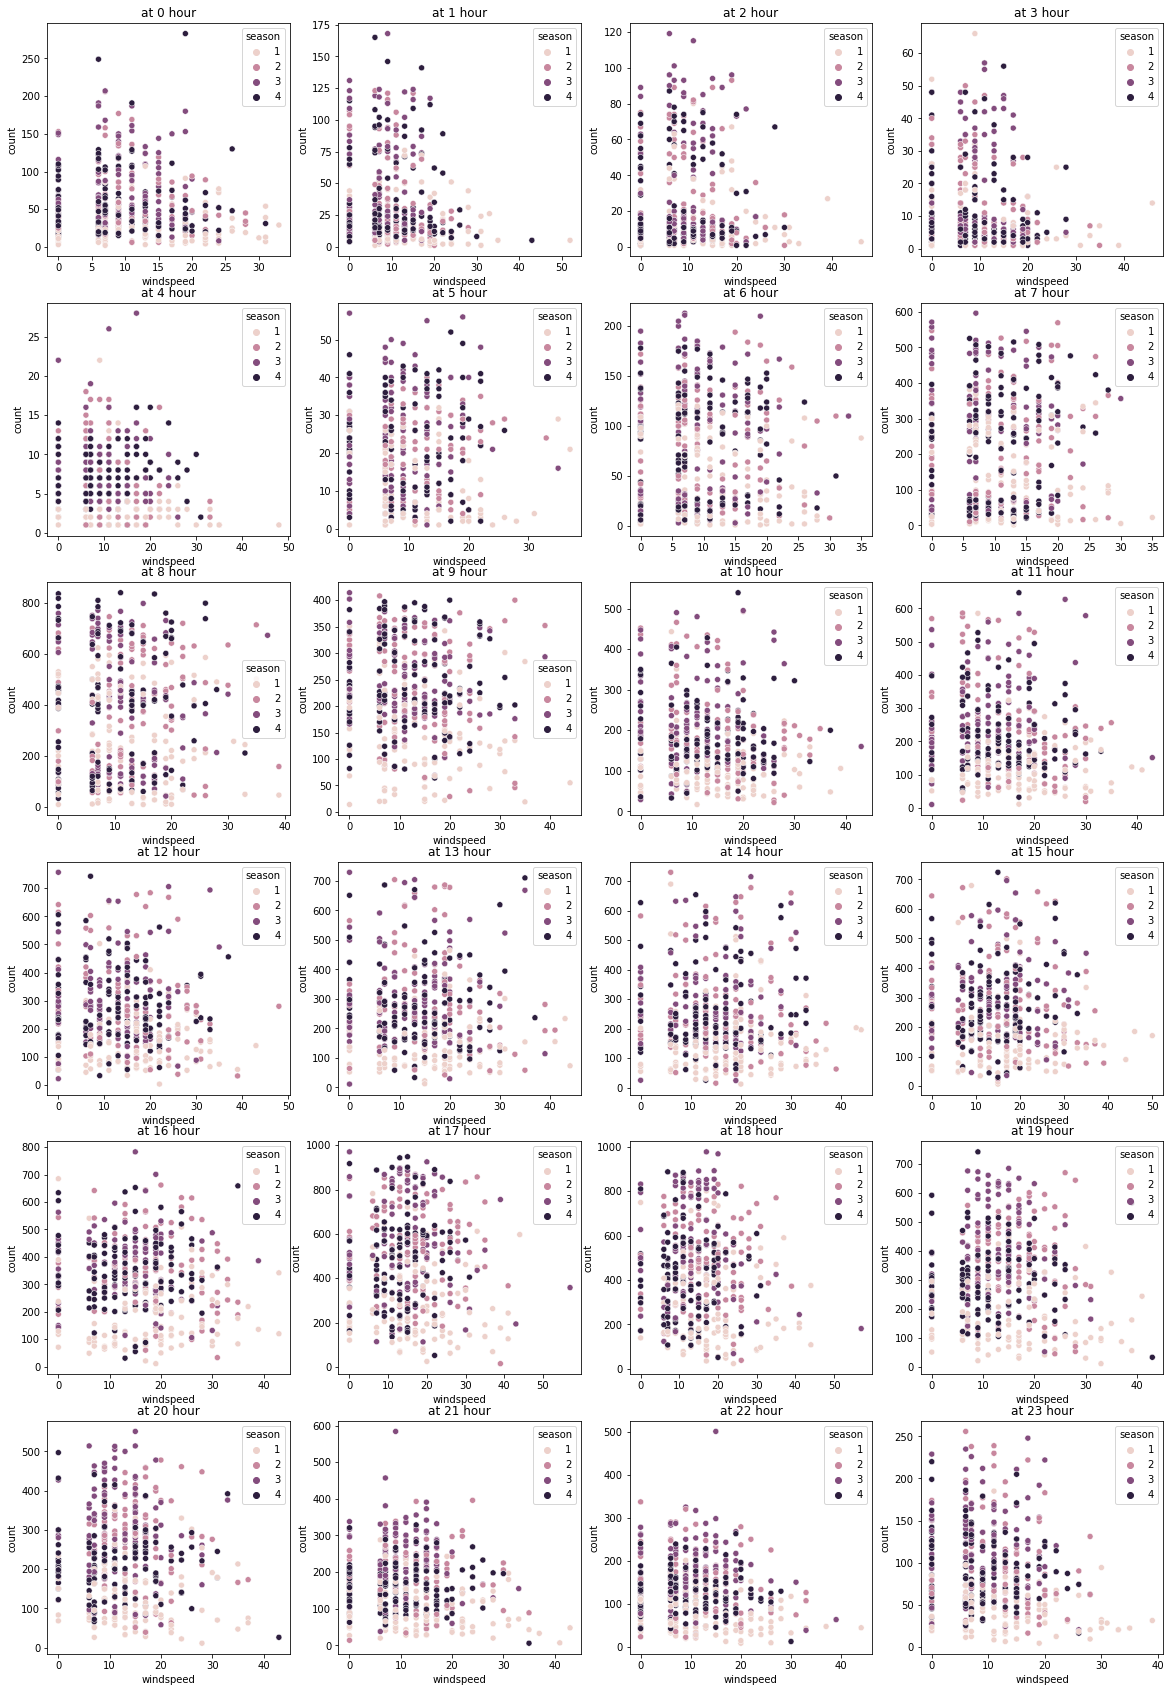

In [21]:
plt.subplots(6,4,figsize=(20,30))

for i in range(1,25): 
    plt.subplot(6,4,i)
    plt.title('at '+str(i-1)+' hour')
    sns.scatterplot(data=yulu_data[yulu_data['hour']==i-1],x='windspeed',y='count',hue='season')
plt.show()

**Significance of Humidity and Windspeed on demand**
- If Humidity or windspeed is high the demand is low.
- On Working day from 7-9 hours the demand is almost same at any Humidity or Windspeed.

**6.Casual users vs registered users**

<AxesSubplot:xlabel='hour', ylabel='registered'>

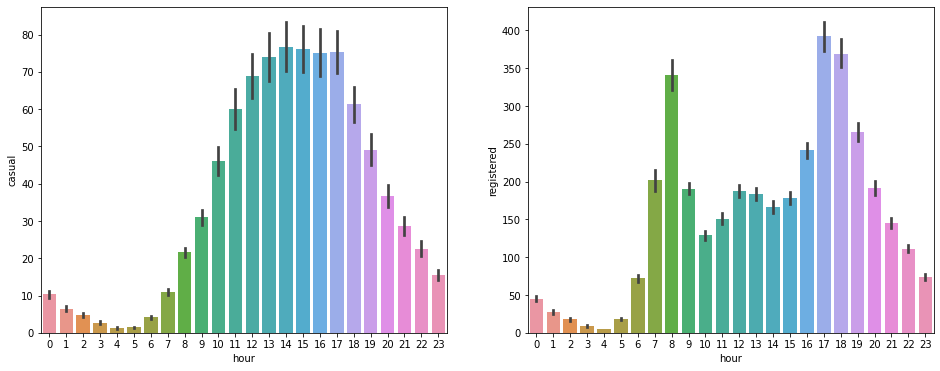

In [22]:
plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(data=yulu_data,x='hour',y='casual')
plt.subplot(1,2,2)
sns.barplot(data=yulu_data,x='hour',y='registered')

<AxesSubplot:xlabel='hour', ylabel='count'>

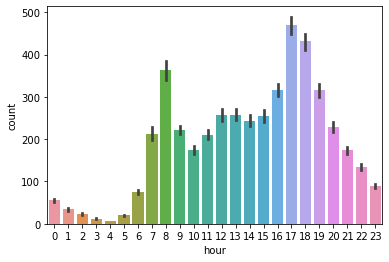

In [23]:
sns.barplot(data=yulu_data,x='hour',y='count')

**Significance of hour on Casual users vs registered users**
- Casual users demand is same from 11-18 hours
- Registered users demand is high in 7-9 and 17-18 hours this implies most of the registered users are working employee's

### Variables that are significant in predicting the demand for shared electric cycles in the Indian market:

**Significance of season on demand**
- Comparing with all seasons in Season 1 deamand is low and in season 3 demand is high.
- From 6 to 16 hours the demand in season 2,3,4 are same.

**Significance of Workingday or Holiday on demand:**
- On Non-Working day the demand is constant from 11 to 16 hours
- On Working day the demand is high in 7-9 and 17-19 hours 
- On Holiday the demand is constant as on Non-Working day

**Significance of weather on demand:**
- Comparing with all weathers, in weather 1 the demand is high and in weather 3 the demand is low.
- In between 6-9 hours the demand in weather 1 and 2 is same.
- As weather 4 data is only in one record we cannot give any conclusion on that.

**Significance of Temperature on demand**
- As the temperature is high there is more demand.
- On Working day from 7-9 hours the demand is almost same at any temperature greater than 10.

**Significance of Humidity and Windspeed on demand**
- If Humidity or windspeed is high the demand is low.
- On Working day from 7-9 hours the demand is almost same at any Humidity or Windspeed.

**Significance of hour on Casual users vs registered users**
- Casual users demand is same from 11-18 hours
- Registered users demand is high in 7-9 and 17-18 hours this implies most of the registered users are working employee's


### Hypothesis Testing

### 1. 2- Sample T-Test 
**To check if Working Day has an effect on the number of electric cycles rented:**

**Visual analysis**

<AxesSubplot:xlabel='workingday', ylabel='count'>

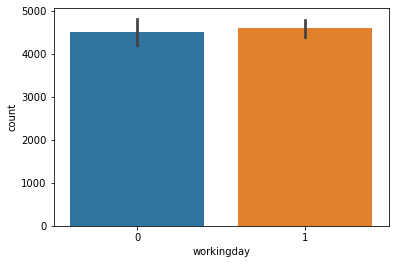

In [24]:
sns.barplot(data=day_data, x='workingday',y='count')

- Not much difference in mean of count on workingday or non-workingday

**Hypothesis formulation**

- H0 : Means of count are equal on workingday and non-workingday
- Ha : Means of count are not equal on workingday and non-workingday
- Significance level = 0.05

**Check test assumptions**

- Both are normally distributed [CLT]
- All observations are independent
- Standard deviation of population not unknown


In [25]:
# Ratio of variance of data should be around 1 [means both are almost equal]
np.var(day_data[day_data['workingday']==0]['count'])/np.var(day_data[day_data['workingday']==1]['count'])

1.139846568241404

**p-value**

In [26]:
stats.ttest_ind(a=day_data[day_data['workingday']==0]['count'],b=day_data[day_data['workingday']==1]['count'])

Ttest_indResult(statistic=-0.44477221614881995, pvalue=0.656696335987859)

- Test statistic= -0.4448
- pvalue= 0.6567

**Conclusion based on the p-value**

- we accept null hypothesis since the pvalue > significance level.
- So the means of rented vehicles on workingday and non-wrokingday are equal. Working Day has no effect on the number of electric cycles rented. 
- we have taken data with respect to daywise. So the total count on that day of workingday and non-workingday is compared. 

### 2. ANNOVA to check if No. of cycles rented is similar or different in different:

### a. Weather:

**Visual analysis**

<AxesSubplot:xlabel='weather', ylabel='count'>

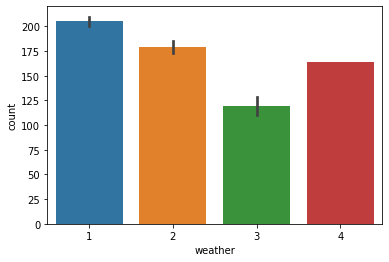

In [27]:
sns.barplot(data=yulu_data, x='weather',y='count')

- There is difference in mean of count in different weather

**Hypothesis formulation**

- H0 : Means of count are equal in different weather
- Ha : Means of count are not equal in different weather
- Significance level = 0.05

**Check test assumptions**

- Number of data values in each weather should be same. we have done random sample and make equal.
- All observations are independent

In [28]:
yulu_data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

lets take sample of 859 of weather 1 and 2. Ignore weather 4 as it is only one data value.

**p-value**

In [29]:
stats.f_oneway(yulu_data[yulu_data['weather']==1].sample(859)['count'],yulu_data[yulu_data['weather']==2].sample(859)['count'],yulu_data[yulu_data['weather']==3]['count'])

F_onewayResult(statistic=54.588711323133694, pvalue=6.0454431053993455e-24)

- Test statistic= 72.2269
- pvalue= 3.0256e-31

**Conclusion based on the p-value**

- we reject null hypothesis since the pvalue < significance level.
- So the means of rented vehicles in different weathers are not equal. No. of cycles rented is similar or different in different weather. 

### b. Season:

**Visual analysis**

<AxesSubplot:xlabel='season', ylabel='count'>

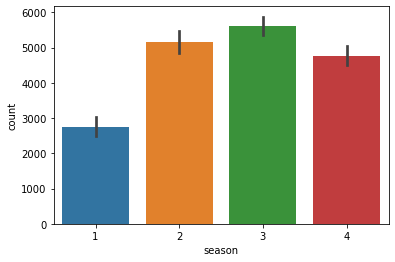

In [30]:
sns.barplot(data=day_data, x='season',y='count')

- There is difference in mean of count in different season

**Hypothesis formulation**

- H0 : Means of count are equal in different season
- Ha : Means of count are not equal in different season
- Significance level = 0.05

**Check test assumptions**

- Number of data values in each season should be same.
- All observations are independent

In [31]:
day_data['season'].value_counts()

1    114
2    114
3    114
4    114
Name: season, dtype: int64

**p-value**

In [32]:
stats.f_oneway(day_data[day_data['season']==1]['count'],day_data[day_data['season']==2]['count'],day_data[day_data['season']==3]['count'],day_data[day_data['season']==4]['count'])

F_onewayResult(statistic=80.0504789788067, pvalue=1.506580502991204e-41)

- statistic=80.0505
- pvalue=1.5066e-41

**Conclusion based on the p-value**

- we reject null hypothesis since the pvalue < significance level.
- So the means of rented vehicles in different season are not equal. No. of cycles rented is similar or different in different season. 

### 3. Chi-square test to check if Weather is dependent on the season:

<AxesSubplot:xlabel='season', ylabel='count'>

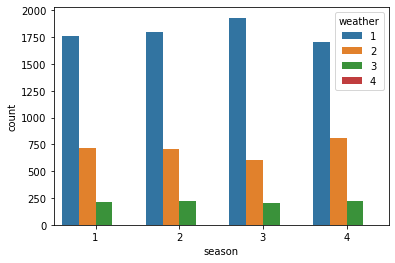

In [33]:
sns.countplot(data=yulu_data, x='season', hue='weather')

In [34]:
pd.crosstab(yulu_data['season'],yulu_data['weather'])

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


**Hypothesis formulation**

- H0 : weather doesnot depend on season
- Ha : weather depend on season
- Significance level = 0.05

**p-value**

In [35]:
stats.chi2_contingency(pd.crosstab(yulu_data['season'],yulu_data['weather']))

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

- P-value= 1.5499e-07

**Conclusion based on the p-value**

- we accept null hypothesis since the pvalue < significance level.
- So the weather doesnot depend on season